# NO Service Calls in 2017 exploration file

This notebook is for exploritory purposes.  Looking at service calls from the New Orleans Open Data website

In [1]:
import requests                           # For pulling in data via api portal
import pandas as pd                       # Quick data frame formatting for CSV file
import io                                 # Reading in the CSV directly from a request response 
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
# pulling in the data from the NOLA open data site
web_pull_csv = requests.get('https://data.nola.gov/resource/bevf-jgit.csv')

In [3]:
# This takes the web response from the api, looks at the content and decodes it using io, and loads it into a pandas dataframe
web_pull_cotnent = web_pull_csv.content
service_call_data_2017 = pd.read_csv(io.StringIO(web_pull_cotnent.decode('utf-8')))

In [4]:
service_call_data_2017.head()


,:@computed_region_7fw3_kdpf,:@computed_region_evki_aju8,:@computed_region_ewbu_t8bu,:@computed_region_k37d_then,:@computed_region_m56f_hbma,:@computed_region_sikx_bdeb,:@computed_region_spev_d8jm,:@computed_region_u4yh_3wk9,beat,block_address,...,policedistrict,priority,selfinitiated,timearrive,timeclosed,timecreate,timedispatch,type_,typetext,zip
0,43.0,8.0,7911.0,5.0,154.0,154.0,3766.0,7911.0,5E02,014XX Egania St,...,5,2B,N,2017-08-04T12:16:19.000,2017-08-04T13:46:22.000,2017-08-04T12:10:59.000,2017-08-04T12:11:34.000,103D,DOMESTIC DISTURBANCE,70117.0
1,12.0,5.0,8154.0,2.0,23.0,23.0,3454.0,8154.0,8I01,003XX Carondelet St,...,8,1A,N,2017-08-04T13:05:15.000,2017-08-04T13:14:26.000,2017-08-04T12:11:14.000,2017-08-04T13:00:39.000,911,SILENT 911 CALL,70112.0
2,42.0,4.0,11704.0,2.0,58.0,58.0,4152.0,11704.0,6E01,014XX Saint Andrew St,...,6,0E,Y,2017-08-04T12:11:52.000,2017-08-04T12:45:37.000,2017-08-04T12:11:52.000,NaN,21P,LOST PROPERTY,70130.0
3,38.0,7.0,1061.0,1.0,106.0,106.0,3772.0,1061.0,3J01,Marshal Foch St & Porteous St,...,3,1I,N,2017-08-04T12:15:54.000,2017-08-04T12:39:25.000,2017-08-04T12:15:39.000,2017-08-04T12:15:39.000,22D,DIRECTED PATROL,70124.0
4,61.0,8.0,3605.0,4.0,139.0,139.0,3766.0,3605.0,5G04,029XX Blk N Galvez St,...,5,1H,N,2017-08-04T12:43:56.000,2017-08-04T13:27:23.000,2017-08-04T12:16:18.000,2017-08-04T12:32:50.000,21,COMPLAINT OTHER,70117.0


In [5]:
service_call_data_2017['priority'].describe()

count     1000
unique      16
top         1H
freq       215
Name: priority, dtype: object

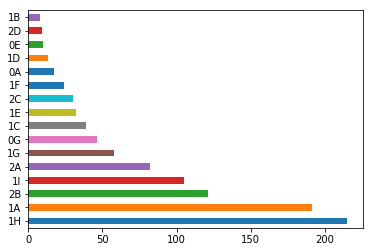

In [6]:
pr = service_call_data_2017['priority'].value_counts()


pr.plot(kind='barh',rot=0)
plt.show()

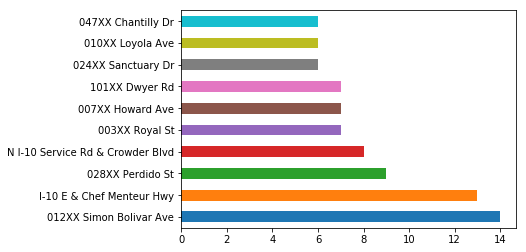

In [7]:

ba = service_call_data_2017['block_address'].value_counts()

#service_call_data_2017['block_address'].hist(bins=10)
ba[:10].plot(kind='barh',rot=0)
plt.show()

In [8]:


typetext = service_call_data_2017['type_']
xy = typetext.value_counts()

In [9]:
type(xy)

pandas.core.series.Series

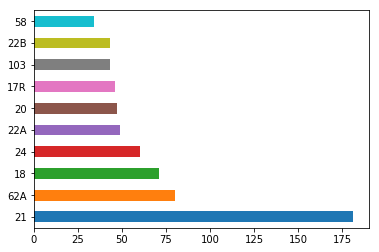

In [10]:

xy[:10].plot(kind='barh',rot=0)
plt.show()

In [11]:
k = xy.keys()
y = list(xy)

In [12]:
k = list(xy[:10].keys())
y = list(xy[:10].values)
y[8]

43

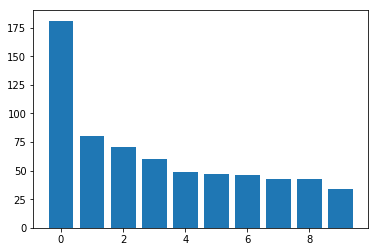

In [13]:
plt.bar(range(len(y)),y)
plt.show()

In [14]:
k

['21', '62A', '18', '24', '22A', '20', '17R', '103', '22B', '58']

In [15]:
import shapely